In [252]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import xpress as xp
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
import folium

In [257]:
customer_coordinates = pd.read_csv('CustomerNorthing.csv').merge(pd.read_csv('CustomerEasting.csv'),how='inner', on='Customers')
customer_coordinates.head()

,Customers,CustomerNorthing,CustomerEasting
0,1,805109,392949
1,2,805438,394404
2,3,800946,393407
3,4,801808,385705
4,5,801140,383616


distance_district_district


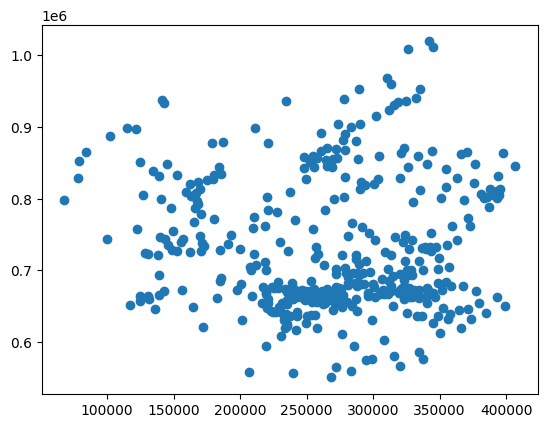

In [258]:
plt.scatter(x=customer_coordinates['CustomerEasting'],y=customer_coordinates['CustomerNorthing'])
# plt.scatter(x=suppliers['X (Easting)'],y=suppliers['Y (Northing)'])

In [260]:
demand_coord = np.column_stack((np.array(customer_coordinates['CustomerEasting']),customer_coordinates['CustomerNorthing']))
kmeans = KMeans(n_clusters= 10, init = 'random', n_init = 1, max_iter=300, random_state = 2)
kmeans = kmeans.fit(demand_coord)

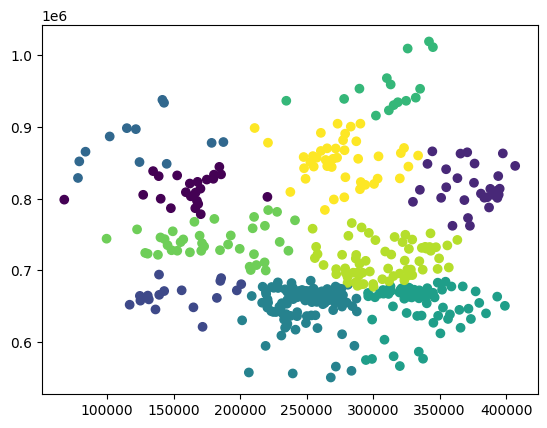

In [261]:
plt.scatter(demand_coord[:,0],demand_coord[:,1],c=kmeans.labels_)

In [108]:
costumers = postcode_district_demand.shape[0]
warehouse_locations = postcode_district_demand.shape[0]

In [266]:
customer_id = pd.read_csv('CustomerId.csv')
customer_id

,Customers,CustomerId
0,1,AB10
1,2,AB11
2,3,AB12
3,4,AB13
4,5,AB14
...,...,...
435,436,TD11
436,437,TD12
437,438,TD13
438,439,TD14


In [265]:
candidate_id = pd.read_csv('CandidateId.csv')
candidate_id

,Candidates,CandidateId
0,1,AB10
1,2,AB11
2,3,AB12
3,4,AB13
4,5,AB14
...,...,...
435,436,TD11
436,437,TD12
437,438,TD13
438,439,TD14


In [267]:
prob = xp.problem('tartan')

# Decision variables
x = np.array([xp.var(vartype=xp.binary, name='x_{0}_{1}_{2}'.format(candidate_id['CandidateId'][i],customer_id['CustomerId'][j],k))
                        for i in range(len(candidate_id)) for j in range(len(customer_id)) for k in range(10) ], dtype=xp.npvar)



# prob.addVariable(warehouse_binary,costumers_binary)



# # Constraints



#     # for key, value in team_size.items():
#     #     allocation_prob.addConstraint(
#     #         sum(time[data_test.loc[i,"priority"]] * 
#     #             (investigate['transaction_{0}_{1}'.format(data_test.loc[i,"transaction_id"],data_test.loc[i,"bank_from"])] 
#     #             - external['external_{0}_{1}'.format(data_test.loc[i,'transaction_id'],data_test.loc[i,'bank_from'])])
#     #             for i in range(len(data_test)) 
#     #             if data_test.loc[i,'interbank']==0 and data_test.loc[i,'bank_from']==key)
#     #         + sum(time[data_test.loc[i,"priority"]] * 0.5 * 
#     #             (investigate['transaction_{0}_{1}'.format(data_test.loc[i,"transaction_id"],data_test.loc[i,j])] 
#     #             - external['external_{0}_{1}'.format(data_test.loc[i,'transaction_id'],data_test.loc[i,j])])
#     #             for i in range(len(data_test)) for j in ['bank_from','bank_to'] 
#     #             if data_test.loc[i,'interbank']==1 and data_test.loc[i,j]==key)
#     #         <= value
#     #     )

# # Objective Function




# # prob.setObjective(
# #         xp.Sum((data.loc[c,'is_scam_transaction'] - 
# #         (constant + banks_weight[bank_index[data.loc[c,'home_bank']]]
# #         + priority_weight[priority_index[data.loc[c,'priority']]]
# #         + category_weight[category_index[data.loc[c,'category']]]
# #         + day_month_weight[day_month_index[data.loc[c,'day_of_month']]]
# #         + transac_prob_weight*data.loc[c,'transac_prob']
# #         + description_prob_weight*data.loc[c,'description_prob']
# #         + customer_prob_weight*data.loc[c,'customer_prob']
# #         ))**2
# #         for c in range(data.shape[0]))
# #         ,sense = xp.minimize)

#     prob.write('reg','lp')

#     prob.solve()

In [271]:
x[10]

x_AB10_AB11_0